# Redis & AI Agents: A Deep Dive Analysis

This notebook analyzes the Stack Overflow Developer Survey 2025 data with **Redis as the centerpiece**, exploring:

### Key Questions:
1. **Redis Adoption**: Who uses Redis and why?
2. **Redis + AI**: How are Redis users leveraging AI?
3. **AI Agents**: How are developers using AI agents?
4. **AI Agent Challenges**: What problems do developers face?
5. **Redis Opportunity**: Where does Redis fit in the AI agent ecosystem?

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Configure Plotly for interactive HTML output in Quarto
pio.renderers.default = 'plotly_mimetype+notebook_connected'

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

## 1. Load and Explore the Data

In [2]:
# Load the survey data
df = pd.read_csv('survey-data/survey_results_public.csv', low_memory=False)
schema = pd.read_csv('survey-data/survey_results_schema.csv')

print(f"Total responses: {len(df):,}")
print(f"Total columns: {len(df.columns)}")
print(f"\nDataset shape: {df.shape}")

Total responses: 49,191
Total columns: 172

Dataset shape: (49191, 172)


## 2. Redis User Segmentation

Let's identify all Redis users and understand their profiles.

In [3]:
# Identify Redis users
redis_users = df[df['DatabaseHaveWorkedWith'].str.contains('Redis', case=False, na=False)].copy()
non_redis_users = df[~df['DatabaseHaveWorkedWith'].str.contains('Redis', case=False, na=False)].copy()

print(f"\n{'='*80}")
print(f"{'REDIS USER SEGMENTATION':^80}")
print(f"{'='*80}")
print(f"\nTotal Redis Users: {len(redis_users):,} ({len(redis_users)/len(df)*100:.1f}% of all developers)")
print(f"Non-Redis Users: {len(non_redis_users):,} ({len(non_redis_users)/len(df)*100:.1f}% of all developers)")
print(f"\nRedis Adoption Rate: {len(redis_users)/len(df)*100:.1f}%")


                            REDIS USER SEGMENTATION                             

Total Redis Users: 7,316 (14.9% of all developers)
Non-Redis Users: 41,875 (85.1% of all developers)

Redis Adoption Rate: 14.9%


## 3. What Languages Do Redis Users Work With?

Understanding the programming language preferences of Redis users.

In [4]:
# Extract languages used by Redis users
redis_languages = []
for langs in redis_users['LanguageHaveWorkedWith'].dropna():
    redis_languages.extend([lang.strip() for lang in str(langs).split(';')])

redis_lang_counts = Counter(redis_languages)
redis_lang_df = pd.DataFrame([
    {'Language': lang, 'Count': count, 'Percentage': (count/len(redis_users))*100}
    for lang, count in redis_lang_counts.most_common(15)
])

print("\nTop 15 Languages Used by Redis Developers:")
print(redis_lang_df.to_string(index=False))


Top 15 Languages Used by Redis Developers:
               Language  Count  Percentage
             JavaScript   5742   78.485511
                    SQL   5336   72.936031
               HTML/CSS   5158   70.503007
                 Python   4659   63.682340
             TypeScript   4467   61.057955
Bash/Shell (all shells)   4254   58.146528
                   Java   2261   30.904866
                     Go   2185   29.866047
                    PHP   1952   26.681247
                     C#   1915   26.175506
             PowerShell   1793   24.507928
                   Rust   1384   18.917441
                    C++   1326   18.124658
                      C   1297   17.728267
                   Ruby   1007   13.764352


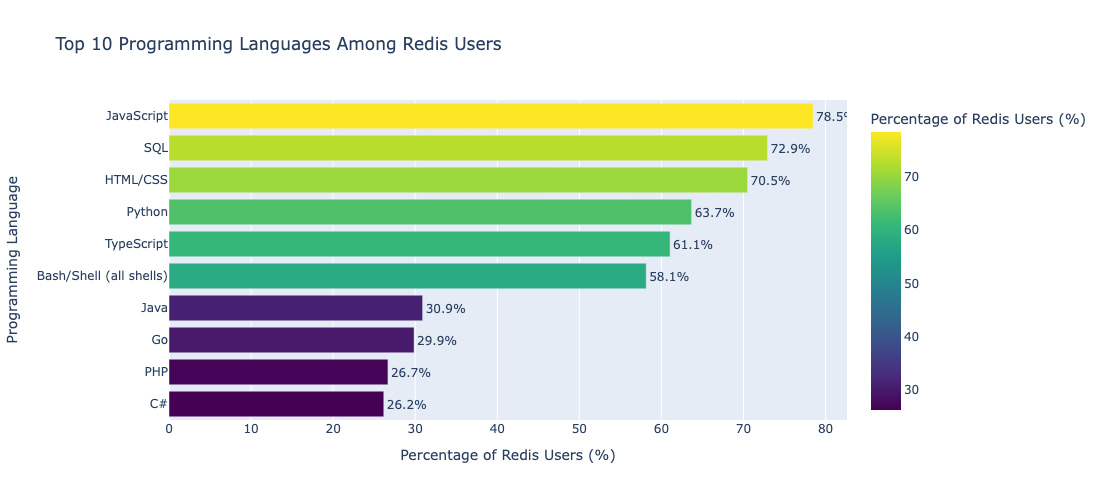

In [5]:
# Visualize Redis user languages
fig = px.bar(redis_lang_df.head(10), 
             x='Percentage', 
             y='Language',
             orientation='h',
             title='Top 10 Programming Languages Among Redis Users',
             labels={'Percentage': 'Percentage of Redis Users (%)', 'Language': 'Programming Language'},
             text='Percentage',
             color='Percentage',
             color_continuous_scale='Viridis')

fig.update_traces(texttemplate='%{text:.1f}%', textposition='outside')
fig.update_layout(height=500, showlegend=False)
fig.update_yaxes(categoryorder='total ascending')
fig.show()

## 4. Redis Users by Developer Role

What types of developers use Redis?

In [6]:
# Extract developer roles for Redis users
redis_roles = []
for roles in redis_users['DevType'].dropna():
    redis_roles.extend([role.strip() for role in str(roles).split(';')])

redis_role_counts = Counter(redis_roles)
redis_role_df = pd.DataFrame([
    {'Role': role, 'Count': count, 'Percentage': (count/len(redis_users))*100}
    for role, count in redis_role_counts.most_common(10)
])

print("\nTop 10 Developer Roles Among Redis Users:")
print(redis_role_df.to_string(index=False))


Top 10 Developer Roles Among Redis Users:
                                Role  Count  Percentage
               Developer, full-stack   2603   35.579552
                 Developer, back-end   1795   24.535265
    Architect, software or solutions    651    8.898305
     DevOps engineer or professional    313    4.278294
                 Engineering manager    289    3.950246
                             Student    172    2.351011
Senior executive (C-suite, VP, etc.)    153    2.091307
             Other (please specify):    139    1.899945
                Developer, front-end    121    1.653909
       Cloud infrastructure engineer    114    1.558229


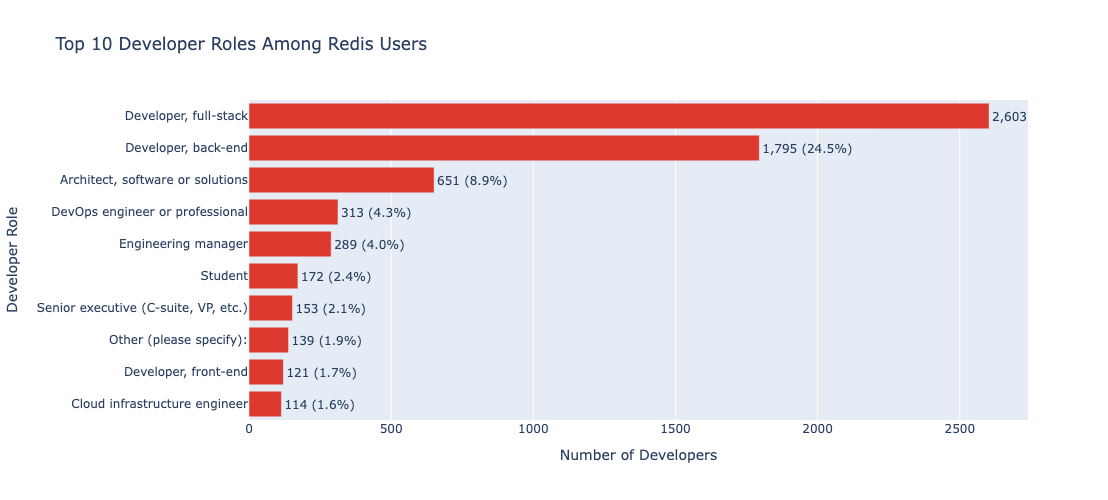

In [7]:
# Visualize Redis user roles
fig = go.Figure(data=[
    go.Bar(y=redis_role_df['Role'], 
           x=redis_role_df['Count'],
           orientation='h',
           text=[f"{count:,} ({pct:.1f}%)" for count, pct in zip(redis_role_df['Count'], redis_role_df['Percentage'])],
           textposition='outside',
           marker_color='#DC382D')
])

fig.update_layout(
    title='Top 10 Developer Roles Among Redis Users',
    xaxis_title='Number of Developers',
    yaxis_title='Developer Role',
    height=500,
    yaxis={'categoryorder': 'total ascending'}
)
fig.show()

## 5. Redis vs Other Databases

How does Redis compare to other popular databases?

In [8]:
# Extract all databases
all_databases = []
for dbs in df['DatabaseHaveWorkedWith'].dropna():
    all_databases.extend([db.strip() for db in str(dbs).split(';')])

db_counts = Counter(all_databases)
db_df = pd.DataFrame([
    {'Database': db, 'Users': count, 'Percentage': (count/len(df))*100}
    for db, count in db_counts.most_common(15)
])

print("\nTop 15 Databases by Usage:")
print(db_df.to_string(index=False))

# Find Redis rank
redis_rank = db_df[db_df['Database'] == 'Redis'].index[0] + 1
print(f"\n🎯 Redis Rank: #{redis_rank} among all databases")


Top 15 Databases by Usage:
                  Database  Users  Percentage
                PostgreSQL  14529   29.535891
                     MySQL  10581   21.510032
                    SQLite   9798   19.918278
      Microsoft SQL Server   7871   16.000894
                     Redis   7316   14.872639
                   MongoDB   6267   12.740135
                   MariaDB   5862   11.916814
             Elasticsearch   4347    8.836982
                    Oracle   2761    5.612815
                  Dynamodb   2551    5.185908
                  BigQuery   1705    3.466081
                  Supabase   1558    3.167246
           Cloud Firestore   1494    3.037141
                        H2   1303    2.648859
Firebase Realtime Database   1299    2.640727

🎯 Redis Rank: #5 among all databases


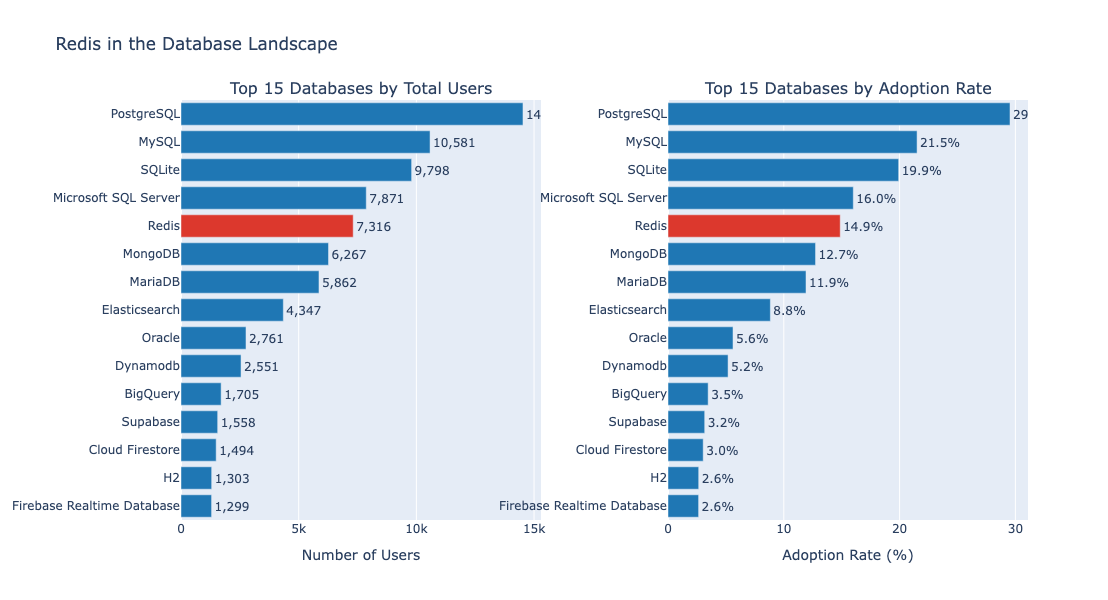

In [9]:
# Visualize database comparison
fig = make_subplots(
    rows=1, cols=2,
    horizontal_spacing=0.15,
    subplot_titles=('Top 15 Databases by Total Users', 'Top 15 Databases by Adoption Rate')
)

# Chart 1: Total users
colors = ['#DC382D' if db == 'Redis' else '#1f77b4' for db in db_df['Database']]
fig.add_trace(go.Bar(
    y=db_df['Database'],
    x=db_df['Users'],
    orientation='h',
    marker_color=colors,
    text=[f"{u:,}" for u in db_df['Users']],
    textposition='outside',
    showlegend=False
), row=1, col=1)

# Chart 2: Adoption rate
fig.add_trace(go.Bar(
    y=db_df['Database'],
    x=db_df['Percentage'],
    orientation='h',
    marker_color=colors,
    text=[f"{p:.1f}%" for p in db_df['Percentage']],
    textposition='outside',
    showlegend=False
), row=1, col=2)

fig.update_layout(
    height=600,
    title_text='Redis in the Database Landscape'
)
fig.update_yaxes(categoryorder='total ascending', row=1, col=1)
fig.update_yaxes(categoryorder='total ascending', row=1, col=2)
fig.update_xaxes(title_text='Number of Users', row=1, col=1)
fig.update_xaxes(title_text='Adoption Rate (%)', row=1, col=2)
fig.show()

## 6. AI Agent Usage Analysis

Now let's explore how developers are using AI agents.

In [10]:
# Analyze AI Agent usage
print(f"\n{'='*80}")
print(f"{'AI AGENT USAGE ANALYSIS':^80}")
print(f"{'='*80}")

# Check if AIAgents column exists
if 'AIAgents' in df.columns:
    ai_agent_usage = df['AIAgents'].value_counts(dropna=True)
    print("\nAI Agent Usage Distribution:")
    for usage, count in ai_agent_usage.items():
        print(f"  {usage}: {count:,} ({count/len(df)*100:.1f}%)")
else:
    print("\nAIAgents column not found in dataset")

# Check AI Agent uses
if 'AIAgent_Uses' in df.columns:
    print("\n" + "="*80)
    print("AI AGENT USE CASES")
    print("="*80)
    
    ai_agent_uses = []
    for uses in df['AIAgent_Uses'].dropna():
        ai_agent_uses.extend([use.strip() for use in str(uses).split(';')])
    
    use_counts = Counter(ai_agent_uses)
    print("\nTop AI Agent Use Cases:")
    for use, count in use_counts.most_common(10):
        print(f"  {use}: {count:,} ({count/len(df)*100:.1f}%)")


                            AI AGENT USAGE ANALYSIS                             

AI Agent Usage Distribution:
  No, and I don't plan to: 12,082 (24.6%)
  No, but I plan to: 5,561 (11.3%)
  Yes, I use AI agents at work daily: 4,509 (9.2%)
  No, I use AI exclusively in copilot/autocomplete mode: 4,401 (8.9%)
  Yes, I use AI agents at work weekly: 2,868 (5.8%)
  Yes, I use AI agents at work monthly or infrequently: 2,498 (5.1%)

AI AGENT USE CASES

Top AI Agent Use Cases:
  Software engineering: 10,294 (20.9%)
  Data and analytics: 3,066 (6.2%)
  IT operations: 2,216 (4.5%)
  Business process automation: 2,165 (4.4%)
  Decision intelligence: 1,385 (2.8%)
  Customer service support: 1,383 (2.8%)
  Marketing: 1,060 (2.2%)
  Cybersecurity: 908 (1.8%)
  Robotics: 485 (1.0%)
  Other Industry purpose (write in):: 266 (0.5%)


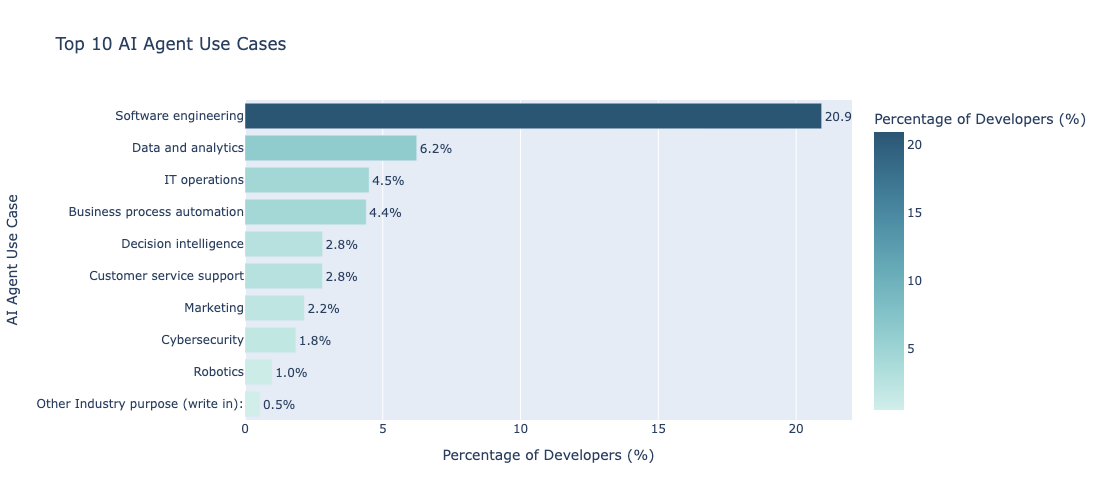

In [11]:
# Visualize AI Agent use cases
if 'AIAgent_Uses' in df.columns:
    use_df = pd.DataFrame([
        {'Use Case': use, 'Count': count, 'Percentage': (count/len(df))*100}
        for use, count in use_counts.most_common(10)
    ])
    
    fig = px.bar(use_df,
                 x='Percentage',
                 y='Use Case',
                 orientation='h',
                 title='Top 10 AI Agent Use Cases',
                 labels={'Percentage': 'Percentage of Developers (%)', 'Use Case': 'AI Agent Use Case'},
                 text='Percentage',
                 color='Percentage',
                 color_continuous_scale='Teal')
    
    fig.update_traces(texttemplate='%{text:.1f}%', textposition='outside')
    fig.update_layout(height=500, showlegend=False)
    fig.update_yaxes(categoryorder='total ascending')
    fig.show()

## 7. Redis Users and AI Adoption

How are Redis users adopting AI compared to non-Redis users?

In [12]:
# Compare AI adoption between Redis and non-Redis users
print(f"\n{'='*80}")
print(f"{'REDIS USERS vs NON-REDIS USERS: AI ADOPTION':^80}")
print(f"{'='*80}")

# AI Learning
if 'LearnCodeAI' in df.columns:
    redis_ai_learn = redis_users['LearnCodeAI'].value_counts(normalize=True) * 100
    non_redis_ai_learn = non_redis_users['LearnCodeAI'].value_counts(normalize=True) * 100
    
    print("\nUsing AI to Learn Coding:")
    print("\nRedis Users:")
    for val, pct in redis_ai_learn.items():
        print(f"  {val}: {pct:.1f}%")
    
    print("\nNon-Redis Users:")
    for val, pct in non_redis_ai_learn.items():
        print(f"  {val}: {pct:.1f}%")

# AI Agent usage comparison
if 'AIAgents' in df.columns:
    redis_ai_agents = redis_users['AIAgents'].value_counts(normalize=True) * 100
    non_redis_ai_agents = non_redis_users['AIAgents'].value_counts(normalize=True) * 100
    
    print("\n" + "="*80)
    print("AI Agent Usage:")
    print("\nRedis Users:")
    for val, pct in redis_ai_agents.items():
        print(f"  {val}: {pct:.1f}%")
    
    print("\nNon-Redis Users:")
    for val, pct in non_redis_ai_agents.items():
        print(f"  {val}: {pct:.1f}%")


                  REDIS USERS vs NON-REDIS USERS: AI ADOPTION                   

Using AI to Learn Coding:

Redis Users:
  Yes, I learned how to use AI-enabled tools required for my job or to benefit my career: 44.3%
  Yes, I learned how to use AI-enabled tools for my personal curiosity and/or hobbies: 33.5%
  No, I learned something that was not related to AI or AI enablement for my personal curiosity and/or hobbies: 8.7%
  No, I learned something that was not related to AI or AI enablement as required for my job or to benefit my career: 8.0%
  No, I didn't spend time learning in the past year: 5.5%

Non-Redis Users:
  Yes, I learned how to use AI-enabled tools required for my job or to benefit my career: 34.7%
  Yes, I learned how to use AI-enabled tools for my personal curiosity and/or hobbies: 30.6%
  No, I learned something that was not related to AI or AI enablement for my personal curiosity and/or hobbies: 12.3%
  No, I didn't spend time learning in the past year: 11.8%
  No, 

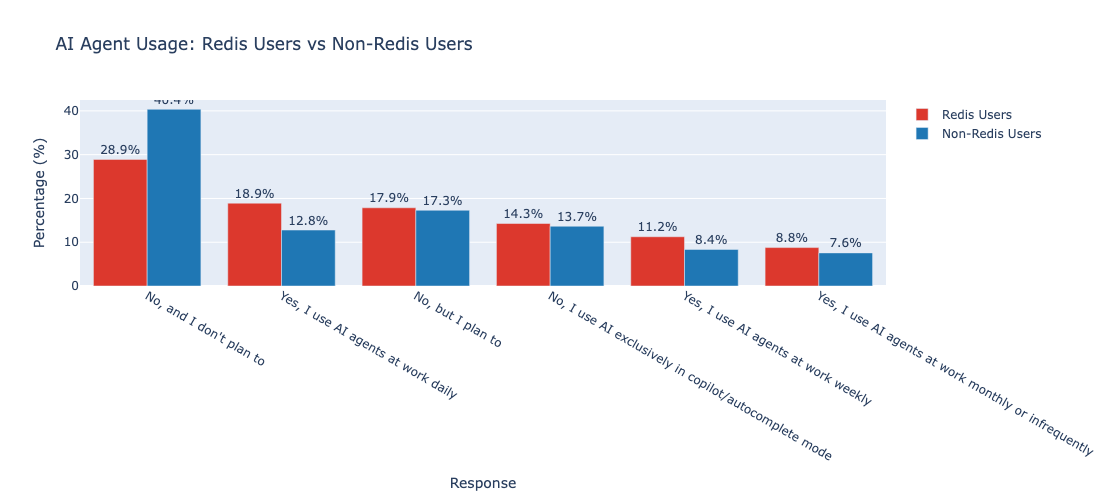

In [13]:
# Visualize AI adoption comparison
if 'AIAgents' in df.columns:
    # Prepare data for comparison
    comparison_data = []
    for response in redis_ai_agents.index:
        comparison_data.append({
            'Response': response,
            'Redis Users': redis_ai_agents.get(response, 0),
            'Non-Redis Users': non_redis_ai_agents.get(response, 0)
        })
    
    comp_df = pd.DataFrame(comparison_data)
    
    fig = go.Figure()
    fig.add_trace(go.Bar(
        name='Redis Users',
        x=comp_df['Response'],
        y=comp_df['Redis Users'],
        text=[f"{v:.1f}%" for v in comp_df['Redis Users']],
        textposition='outside',
        marker_color='#DC382D'
    ))
    fig.add_trace(go.Bar(
        name='Non-Redis Users',
        x=comp_df['Response'],
        y=comp_df['Non-Redis Users'],
        text=[f"{v:.1f}%" for v in comp_df['Non-Redis Users']],
        textposition='outside',
        marker_color='#1f77b4'
    ))
    
    fig.update_layout(
        title='AI Agent Usage: Redis Users vs Non-Redis Users',
        xaxis_title='Response',
        yaxis_title='Percentage (%)',
        barmode='group',
        height=500
    )
    fig.show()

## 8. AI Agent Challenges and Pain Points

What challenges do developers face when using AI agents?

In [14]:
# Analyze AI Agent challenges
print(f"\n{'='*80}")
print(f"{'AI AGENT CHALLENGES':^80}")
print(f"{'='*80}")

# Look for challenge-related columns
challenge_cols = [col for col in df.columns if 'AIAgentChallenge' in col]
print(f"\nFound {len(challenge_cols)} challenge-related columns")

if challenge_cols:
    print("\nAI Agent Challenges:")
    for col in challenge_cols:
        # Extract the challenge name from column
        challenge = col.replace('AIAgentChallenges', '')
        if challenge:
            count = df[col].notna().sum()
            pct = (count / len(df)) * 100
            print(f"  {challenge}: {count:,} ({pct:.1f}%)")


                              AI AGENT CHALLENGES                               

Found 5 challenge-related columns

AI Agent Challenges:
  Neutral: 21,295 (43.3%)
  Somewhat disagree: 12,125 (24.6%)
  Strongly agree: 23,108 (47.0%)
  Somewhat agree: 21,947 (44.6%)
  Strongly disagree: 9,314 (18.9%)


## 9. Redis and AI Adoption

Analyzing the intersection of Redis users and AI adoption.

In [15]:
# Redis users who are also using AI heavily
print(f"\n{'='*80}")
print(f"{'REDIS + AI: THE OPPORTUNITY':^80}")
print(f"{'='*80}")

# Filter Redis users who use AI agents
if 'AIAgents' in df.columns:
    redis_ai_users = redis_users[redis_users['AIAgents'].notna()]
    print(f"\nRedis users who responded to AI Agent questions: {len(redis_ai_users):,}")
    print(f"Percentage of Redis users: {len(redis_ai_users)/len(redis_users)*100:.1f}%")

# Check what AI models Redis users work with
if 'AIModelsHaveWorkedWith' in df.columns:
    redis_ai_models = []
    for models in redis_users['AIModelsHaveWorkedWith'].dropna():
        redis_ai_models.extend([model.strip() for model in str(models).split(';')])
    
    model_counts = Counter(redis_ai_models)
    print("\n" + "="*80)
    print("AI Models Used by Redis Developers:")
    print("="*80)
    for model, count in model_counts.most_common(10):
        print(f"  {model}: {count:,} ({count/len(redis_users)*100:.1f}%)")


                          REDIS + AI: THE OPPORTUNITY                           

Redis users who responded to AI Agent questions: 6,997
Percentage of Redis users: 95.6%

AI Models Used by Redis Developers:
  openAI GPT (chatbot models): 3,949 (54.0%)
  Anthropic: Claude Sonnet: 2,448 (33.5%)
  openAI Reasoning models: 1,920 (26.2%)
  Gemini (Flash general purpose models): 1,849 (25.3%)
  openAI Image generating models: 1,492 (20.4%)
  Gemini (Pro Reasoning models): 1,435 (19.6%)
  DeepSeek (R- Reasoning models): 1,289 (17.6%)
  Meta Llama (all models): 1,055 (14.4%)
  DeepSeek (V- General purpose models): 758 (10.4%)
  Mistral AI models: 641 (8.8%)


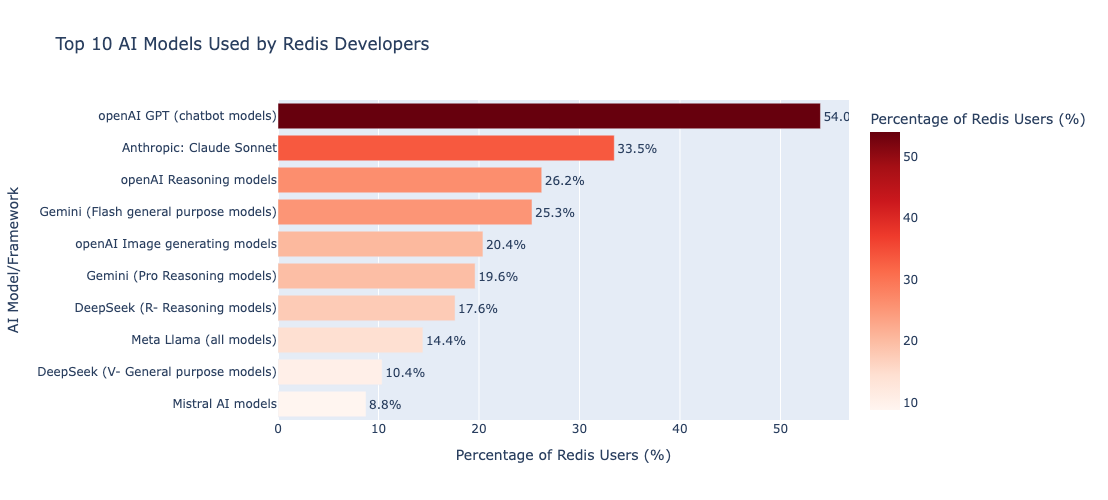

In [16]:
# Visualize AI models used by Redis developers
if 'AIModelsHaveWorkedWith' in df.columns and len(model_counts) > 0:
    model_df = pd.DataFrame([
        {'AI Model': model, 'Count': count, 'Percentage': (count/len(redis_users))*100}
        for model, count in model_counts.most_common(10)
    ])
    
    fig = px.bar(model_df,
                 x='Percentage',
                 y='AI Model',
                 orientation='h',
                 title='Top 10 AI Models Used by Redis Developers',
                 labels={'Percentage': 'Percentage of Redis Users (%)', 'AI Model': 'AI Model/Framework'},
                 text='Percentage',
                 color='Percentage',
                 color_continuous_scale='Reds')
    
    fig.update_traces(texttemplate='%{text:.1f}%', textposition='outside')
    fig.update_layout(height=500, showlegend=False)
    fig.update_yaxes(categoryorder='total ascending')
    fig.show()

## 10. Technology Stack: Redis + AI Ecosystem

What other technologies do Redis + AI users work with?

In [17]:
# Identify Redis users who also use AI
if 'AIModelsHaveWorkedWith' in df.columns:
    redis_ai_combo = redis_users[redis_users['AIModelsHaveWorkedWith'].notna()]
    
    print(f"\n{'='*80}")
    print(f"{'REDIS + AI TECHNOLOGY STACK':^80}")
    print(f"{'='*80}")
    print(f"\nDevelopers using both Redis AND AI: {len(redis_ai_combo):,}")
    print(f"Percentage of all Redis users: {len(redis_ai_combo)/len(redis_users)*100:.1f}%")
    print(f"Percentage of all developers: {len(redis_ai_combo)/len(df)*100:.1f}%")
    
    # Top languages for Redis + AI users
    redis_ai_langs = []
    for langs in redis_ai_combo['LanguageHaveWorkedWith'].dropna():
        redis_ai_langs.extend([lang.strip() for lang in str(langs).split(';')])
    
    lang_counts = Counter(redis_ai_langs)
    print("\nTop 10 Languages for Redis + AI Developers:")
    for lang, count in lang_counts.most_common(10):
        print(f"  {lang}: {count:,} ({count/len(redis_ai_combo)*100:.1f}%)")
    
    # Top databases for Redis + AI users (besides Redis)
    redis_ai_dbs = []
    for dbs in redis_ai_combo['DatabaseHaveWorkedWith'].dropna():
        redis_ai_dbs.extend([db.strip() for db in str(dbs).split(';')])
    
    db_counts_ai = Counter(redis_ai_dbs)
    print("\nTop 10 Databases for Redis + AI Developers:")
    for db, count in db_counts_ai.most_common(10):
        print(f"  {db}: {count:,} ({count/len(redis_ai_combo)*100:.1f}%)")


                          REDIS + AI TECHNOLOGY STACK                           

Developers using both Redis AND AI: 4,712
Percentage of all Redis users: 64.4%
Percentage of all developers: 9.6%

Top 10 Languages for Redis + AI Developers:
  JavaScript: 3,777 (80.2%)
  SQL: 3,484 (73.9%)
  HTML/CSS: 3,390 (71.9%)
  Python: 3,151 (66.9%)
  TypeScript: 3,066 (65.1%)
  Bash/Shell (all shells): 2,742 (58.2%)
  Go: 1,436 (30.5%)
  Java: 1,434 (30.4%)
  C#: 1,240 (26.3%)
  PHP: 1,222 (25.9%)

Top 10 Databases for Redis + AI Developers:
  Redis: 4,712 (100.0%)
  PostgreSQL: 3,660 (77.7%)
  MySQL: 2,281 (48.4%)
  SQLite: 2,258 (47.9%)
  MongoDB: 1,791 (38.0%)
  Elasticsearch: 1,568 (33.3%)
  MariaDB: 1,410 (29.9%)
  Microsoft SQL Server: 1,180 (25.0%)
  Dynamodb: 834 (17.7%)
  Supabase: 542 (11.5%)


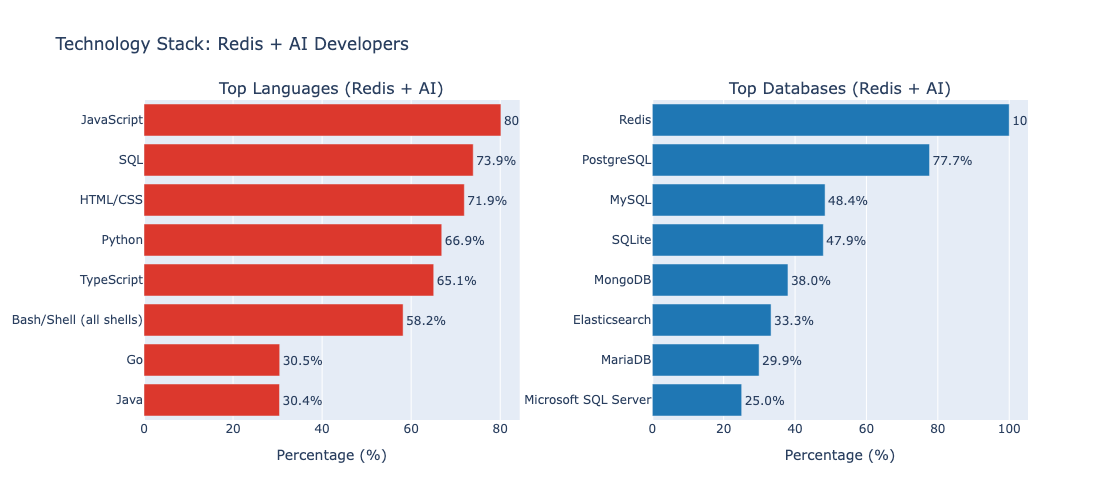

In [18]:
# Create comprehensive visualization of Redis + AI tech stack
if 'AIModelsHaveWorkedWith' in df.columns and len(redis_ai_combo) > 0:
    fig = make_subplots(
        rows=1, cols=2,
        horizontal_spacing=0.15,
        subplot_titles=('Top Languages (Redis + AI)', 'Top Databases (Redis + AI)')
    )
    
    # Languages
    lang_df = pd.DataFrame([
        {'Language': lang, 'Percentage': (count/len(redis_ai_combo))*100}
        for lang, count in lang_counts.most_common(8)
    ])
    
    fig.add_trace(go.Bar(
        y=lang_df['Language'],
        x=lang_df['Percentage'],
        orientation='h',
        marker_color='#DC382D',
        text=[f"{p:.1f}%" for p in lang_df['Percentage']],
        textposition='outside',
        showlegend=False
    ), row=1, col=1)
    
    # Databases
    db_df_ai = pd.DataFrame([
        {'Database': db, 'Percentage': (count/len(redis_ai_combo))*100}
        for db, count in db_counts_ai.most_common(8)
    ])
    
    fig.add_trace(go.Bar(
        y=db_df_ai['Database'],
        x=db_df_ai['Percentage'],
        orientation='h',
        marker_color='#1f77b4',
        text=[f"{p:.1f}%" for p in db_df_ai['Percentage']],
        textposition='outside',
        showlegend=False
    ), row=1, col=2)
    
    fig.update_layout(
        height=500,
        title_text='Technology Stack: Redis + AI Developers'
    )
    fig.update_yaxes(categoryorder='total ascending', row=1, col=1)
    fig.update_yaxes(categoryorder='total ascending', row=1, col=2)
    fig.update_xaxes(title_text='Percentage (%)', row=1, col=1)
    fig.update_xaxes(title_text='Percentage (%)', row=1, col=2)
    fig.show()

## 11. Key Insights and Recommendations

### Summary of Findings

In [ ]:
# Generate comprehensive summary
print(f"\n{'='*80}")
print(f"{'KEY INSIGHTS: REDIS & AI AGENTS':^80}")
print(f"{'='*80}")

print("\n📊 REDIS ADOPTION:")
print(f"  • Total Redis Users: {len(redis_users):,} ({len(redis_users)/len(df)*100:.1f}% of all developers)")
print(f"  • Redis Rank: #{redis_rank} among all databases")

if 'AIModelsHaveWorkedWith' in df.columns:
    print("\n🤖 REDIS + AI INTERSECTION:")
    print(f"  • Redis users working with AI: {len(redis_ai_combo):,} ({len(redis_ai_combo)/len(redis_users)*100:.1f}% of Redis users)")
    print(f"  • This represents {len(redis_ai_combo)/len(df)*100:.1f}% of all survey respondents")

if 'AIAgents' in df.columns:
    print("\n🎯 AI AGENT USAGE:")
    ai_agent_users = df[df['AIAgents'].notna()]
    print(f"  • Developers using AI Agents: {len(ai_agent_users):,} ({len(ai_agent_users)/len(df)*100:.1f}%)")
    
    redis_with_agents = redis_users[redis_users['AIAgents'].notna()]
    print(f"  • Redis users with AI Agents: {len(redis_with_agents):,} ({len(redis_with_agents)/len(redis_users)*100:.1f}% of Redis users)")

print("\n💡 TOP LANGUAGES FOR REDIS USERS:")
for lang, count in redis_lang_counts.most_common(5):
    print(f"  • {lang}: {count/len(redis_users)*100:.1f}%")

print("\n🎓 TOP DEVELOPER ROLES FOR REDIS USERS:")
for role, count in redis_role_counts.most_common(5):
    print(f"  • {role}: {count:,} developers")

print("\n" + "="*80)
print("RECOMMENDATIONS:")
print("="*80)
print("\n1. 🎯 TARGET AUDIENCE:")
print("   Redis has strong adoption among backend and full-stack developers")
print("   who are increasingly working with AI technologies.")
print("\n2. 🚀 AI INTEGRATION OPPORTUNITY:")
print("   A significant portion of Redis users are already working with AI models.")
print("   Redis is well-positioned to support AI agent architectures with:")
print("   - Vector search capabilities")
print("   - Fast caching for LLM responses")
print("   - Session management for conversational AI")
print("   - Real-time data for agent decision-making")
print("\n3. 📚 DEVELOPER EDUCATION:")
print("   Focus on educating developers about Redis use cases in AI:")
print("   - Semantic caching")
print("   - Vector similarity search")
print("   - Agent state management")
print("   - RAG (Retrieval-Augmented Generation) pipelines")
print("\n4. 🔧 LANGUAGE SUPPORT:")
print("   Priority languages for Redis + AI tooling:")
print("   - Python (already strong with RedisVL)")
print("   - JavaScript/TypeScript (high demand, as shown in previous analysis)")
print("   - Java (enterprise adoption)")
print("\n" + "="*80)